# TxMM 2024/25
## Assignment 1: Preprocessing & NLP

Imagine you have a scientific interest in what people dream about. What are frequent motifs in dreams? Many of us have probably dreamed about falling from great heights or socially embarassing situations, but which is more common?

To find out, we could recruit a number of volunteers and ask them to keep a dream journal. This would give us a small reliable sample of dream reports. As an alternative to gather much more data, we can try tapping a source of information that's close to lots of people, namely their Twitter feeds.

As a researcher you must be aware that your data sample choice is not a representative reflection of actual dream behavior in general. The scope of your study is limited by several biases (in this case: limited to people who are on Twitter, only those dreams they are willing to share; they do not tweet exhaustively, but tweet when they have the time).

In this study we try to answer the following research question:
What are the dream themes most frequently described on Twitter?

Learning goals of this assignment:

- Get hands-on experience with text preprocessing and the characteristics of textual data
- Learn that cleaning and filtering of textual data is not a simple or trivial task
- Learn to convert a research question to a set of steps to find an answer to the question
- Learn that looking at and into your data set is essential to grasp whether your data set is actually suited to answer your research question
- Get acquainted with some tools for natural language processing (NLP)

Note that the assignment will be graded with a Pass/Fail system.

Whenever you have any questions, **make sure to checkout the FAQ at the bottom of this notebook**. If you cannot find your answer there or if you have some conceptual questions, you can simply talk with the TAs via email: nityaa.kalra@ru.nl and raul.mihalca@ru.nl  or join the weekly office hour. The TAs would appreciate it if you do not contact them via WhatsApp for non-urgent matters, so they can keep the TA work and private life (somewhat) separate.

_We only support the use of [Google Colab](https://colab.research.google.com/) as all assignments have been implemented and tested using this. In case of (strange) bugs on other platforms, please consider switching to Colab to make sure that we can provide with all the help you may need._


Most of you will have worked with Python notebooks before, but for some, this might be entirely new. Here is a brief introduction on how they work. You can skip this section if you feel confident in your knowledge of notebooks.

## Brief notebook tutorial



### Starting a notebook server

The easiest way to run a notebook is to upload the notebook file to a service such as [Google Colab](https://colab.research.google.com) or [Kaggle](https://www.kaggle.com/kernels). These sites offer free computational resources that you can use to run notebooks and a relatively hassle-free, as you don't have to install Python, Jupyter, or any supporting libraries. We recommend the use of Google Colab, as this is the platform that all assignments have been implemented and tested on.

If you would like to run the notebook on your own machine instead, you can follow the tutorial [here](https://jupyter.readthedocs.io/en/latest/install.html).

### Running the notebook

Once you have your notebook server running (either on a website or locally), you can start executing code. Notebooks are great in cases where you want to interleave code and text, e.g. when you want to perform a data analysis and provide some commentary of the findings along the side. They are not so great for production-level systems, e.g. when you work for a company and are tasked with designing a component to perform some textual analytics task. For these purposes, scripts should be used. In later assignments, we'll also use those, but for now, notebooks are ideal. With growing experience, you'll get a feeling for when each tool is appropriate.

Notebooks distinguish between code cells and text cells. Code cells may contain arbritrary Python code. They can be executed in arbritary order. Text cells contain markup. When executed, they will change and show the formatted output of the markup. In this assignment, use code cells to perform text mining tasks and text cells to comment on findings or answer questions we ask you. To get you started, here's a simple question. Answer every question marked with a **Q** directly in the same cell.

**Q:** What cell types can you find in a notebook?

**A:** *Your answer here*

The following code cell contains a simple print statement. The output of all the statements will be shown below the cell that produced them, so the string will be printed below the following cell. Run the cell, then maybe change one or two of the variables to see the effects.

In [ ]:
course_name = 'TxMM'
course_year = 2024

print(f'Welcome to {course_name}, {course_year} edition!')

An important thing to keep in mind is that variables that you declare in one cell stay in memory once it has been executed. This is a powerful tool, as it allows you to refer back to variables you've already computed and to effectively split your task in managable chunks. Like every powerful tool, it also involves complexity: Make sure to execute cells in the correct order, because otherwise variables might not have their intended values when a cell refers to them. Even worse, they might not even be instantiated, giving rise to an error.

In [ ]:
print(f'Next year we\'ll welcome students for {course_name}, {course_year + 1} edition.')

Try changing one of the variables above without running the cell where they are declared. You'll notice that when you run the second code cell, the values won't get updated.

### Importing and installing packages
Notebooks rely on a *kernel* or *runtime* to execute Python code. This is a separate Python process. When a call to a function crashes, you might get a message about the kernel having died. Sometimes, you might also need to manually restart the kernel. As with every Python process, this one comes with a number of pre-installed packages, such as *os* for system calls to for example read files or *re* for regular expressions. Importing these packages is easy and works just like in normal scripts.



In [ ]:
# import the system library
import re

input_string = 'TxMM is good fun.'
# use a function from the library
match = re.search('fun', input_string)

print(match)

In contrast, some packages might not be installed. In this assignment, we'll use some packages that you have to install yourself. In a normal Python environment, you can use *pip* to install packages on the command line. To do the same in a notebook, run the command in a code cell, but make sure to prepend it with an exclamation mark. This tells the kernel to hand this command to the system command line. See the following cell for an example.


In [ ]:
!pip install nltk==3.4

If the package was installed in the first place, the output will read *Requirement already satisfied*. If not, you should get a message informing about the successful installation.

### Uploading (data) files to Colab
In case you're using Google Colab, you also need to upload any other files you need, such as your data. On your left hand side, you can click the 'folder' icon. After the menu opens, you can click the upload button and select any file you need to upload. For this assignment, you'll need to upload the *tweets_clean.txt* file from Brightspace in the *sample_data* folder. Note that every time you restart runtime, you need to upload the file(s) again.


*Note about uploading the text file to Colab: Some people have experienced problems with uploading the file on Windows. Instead of using the upload functionality, you can also download the file directly in the notebook. Run the following command in a code cell to do so:*

!wget https://github.com/RaulMihalcaRU/TxMM/raw/main/tweets_clean.txt

These are the most important things you need to know about notebooks. We'd recommend you to just get started now, but if you run into any trouble, you can check out the following [blogpost](https://www.dataquest.io/blog/jupyter-notebook-tutorial/).


## Loading data



In this assignment, we'll look at collection of roughly 96,000 tweets crawled from the Twitter API between June and August 2014. Every tweet contains the phrase *I dreamed* or the phrase *I have dreamt*. Rather than storing each tweet in a separate file, all tweets have been dumped to a single file. Each line corresponds to a single tweet. For each tweet, the following information is stored:

*   **phrase**: the query phrase that matched the tweet
*   **tweet_id**: a unique tweet id
*   **username**: the name of the user that sent the tweet
*   **time**: the exact time the tweet was sent
*   **tweet_text**: the actual text that was sent

Individual chunks of information are separated by a tab character.

*In case you're using Colab, and you have not yet uploaded the data file tweets_clean.txt, please do so. For more explanation, see the brief notebook tutorial above.*

First, we'll need to define a function that iterates over the whole file line by line, splits the line into chunks, and then returns a list of parsed tweets.

Task 1: Implement the function below. It takes a path as its arguments and returns a list of lists. Each tweet is a list of the chunks we found in the file.

In [1]:


# hint: although usually an library call is good as the first start, try to only use inbuilt functions for this
def load_data(data_path):
    with open(data_path, 'r') as f:
        tweets = list(map(lambda line: line.split('\t'),f.readlines()))
    return tweets

Let's load the data and briefly inspect it.

In [2]:
# Note: if you did not put the txt file in the sample_data folder, then you'll need to change the path below
path_to_data = 'tweets_clean.txt'
tweets = load_data(path_to_data)

The following cell contains some assert statements. They check if a condition hold and print a string if otherwise. If there's no output after running the cell, your function should have worked correctly. If not, use the string output to find out what is wrong.

In [3]:
assert len(tweets) == 96118,'Not all tweets were loaded.'
assert isinstance(tweets[0],list),'Every tweet should be a list of elements.'
assert len(tweets[0]) == 5, 'Every tweet should contain exactly five elements.'

In [4]:
# print some tweets
print(tweets[54])
print(tweets[7])
print(tweets[683])
print(tweets[12612])

['I dreamed', '474123118932287488', 'justprencess', 'Wed Jun 04 09:38:54 +0000 2014', "@AustinMahone I dreamed last night that I met you and tell you I love you and I am very sad, I think it's beautiful interpretation of this\n"]
['I dreamed', '473392365051584512', 'niallzmuffin', 'Mon Jun 02 09:15:09 +0000 2014', 'Liam in the middle this is what i dreamed for http://t.co/yT3w0KpeOO\n']
['I dreamed', '474280508600619008', 'HasnaObk', 'Wed Jun 04 20:04:19 +0000 2014', '@edsheeran @BBCR1 I dreamed that you rolling on the floor with a guitar in front of the house of Justin Bieber. Ok\n']
['I dreamed', '477295325133029377', 'wherebiebers', 'Fri Jun 13 03:44:07 +0000 2014', '@LittlecBeadles please follow me, i dreamed about this, love you :-( have hope!! #BeadlesBabes 😭💓 pls\n']


Having the tweets as a list of lists is possible, but doesn't allow us to sort or filter them easily. We can use a package called pandas to make this task easier: Our collection of tweets becomes a *DataFrame* object, which is essentially just a big table. Every tweet is a row in the table, whereas each of the individual information chunks becomes a column. Later on, we'll see why this is useful. First, we'll install and import pandas and then load the tweets into a DataFrame object.




In [5]:
# Install and import pandas
# !pip install pandas
import pandas as pd

In [6]:
# Define the column names
names = ['phrase', 'tweet_id', 'username', 'time', 'tweet_text']
# Create the dataframe with tweets as data and names as column names
tweets = pd.DataFrame(tweets, columns = names)
# Parse the time stamp strings to date objects we can sort on
tweets['time'] =  pd.to_datetime(tweets['time'])
# Sort on the date and reset the index
tweets = tweets.sort_values('time')
tweets = tweets.reset_index(drop=True)

# Print the shape of the dataframe and the first few rows
print(tweets.shape)
print(tweets.head())

/tmp/ipykernel_24968/2705820139.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tweets['time'] =  pd.to_datetime(tweets['time'])


(96118, 5)
      phrase            tweet_id       username                      time  \
0  I dreamed  471925171192733696   rainquotesss 2014-05-29 08:05:03+00:00   
1  I dreamed  471996900963778560   FakeJDGreear 2014-05-29 12:50:05+00:00   
2  I dreamed  472240786533523456   Jared__Boyle 2014-05-30 04:59:11+00:00   
3  I dreamed  472256157265166336   awkwardposts 2014-05-30 06:00:16+00:00   
4  I dreamed  472267763570843649  melissabroder 2014-05-30 06:46:23+00:00   

                                          tweet_text  
0        "I Dreamed I Had An Interview With God.."\n  
1  RT @JoelOsteen: Surround urself w people that ...  
2  Love has a thousand faces, but I see youBefore...  
3  i have childhood memories that i am not 100% s...  
4       show me on the solipsism where i dreamed u\n  


## Text analysis

Let's first get an overview of the dataset. There's a lot of tweets in there, but we don't know how many of them contain genuine descriptions of dreams. To take a dive and inspect a number of tweets in an easy manner, an interactive scatter plot is the right tool.

In [7]:
# Compute a new column (or Series) by using the map function on an existing column
# Each element in tweet_text gets fed to the len function
# The results get stored in the new column
tweets['length'] = tweets.tweet_text.map(len)

The following cell installs a specific version of the plotting library we want to use. If a previous version is already installed, it will get uninstalled automatically, but there might be output asking you to restart the runtime / kernel. Do so via the menu above and then run the cells above again.

In [ ]:
# You might have to restart your runtime after this line executes
# See FAQ in case this raises an error
!pip install plotly=='5.5.0'

In [8]:
import plotly.express as px
# Plot some random 50 tweets, including their text in the hover field
px.scatter(tweets[5000:5050],x='time',y='length',hover_data=['tweet_text'], color_discrete_sequence=px.colors.qualitative.Plotly)

Q1: Look at the 50 tweets in the plot, reading their content as you hover over them.

1.1) Roughly, what percentage of those are genuine descriptions of what people dreamed of on the previous nights? \\
1.2) When people are not tweeting about what they are dreaming about, what is their intention? Describe two different intentions that you notice.

A: Around 30% of the tweets are about what people actually dreamed in the previous night. In the other cases people are talking about dreams as in things they want to achieve in life or they are talking about dreams in general. There are also a lot of retweets present in this subset.

## Cleaning data



Unfortunately, the world is a messy place. Data is hardly ever ready for analysis or model-training, but instead requires manual cleaning. In this section of the assignment, we'll take some steps specifically needed for social media analysis.

As we are interested in those tweets that contain actual dream descriptions, we aim to filter out duplicates and retweets as they are not expressing personal dream experiences.


### Finding retweets

In the export format, retweets always contain 'RT', followed by a space, and a '@'.

Task 2: Change the function stub below to capture retweets *as defined above*, so they can be removed. The function takes a string and should return a boolean that indicates whether the string is a retweet.

In [9]:
# A function that indicates whether a string is a retweet
def isRetweet(string): #write YOUR_CODE_HERE
    return 'RT @' in string

In [10]:
test_1 = isRetweet('RT @Tester this is a test!')
assert test_1 == True, 'Your function missed a retweet!'
test_2 = isRetweet('This is also a retweet RT @Tester This is a tweet')
assert test_2 == True, 'Your function missed a retweet!'
test_3 = isRetweet('@Someone: RT @Tester: Some tweet text.')
assert test_3 == True, 'Your function missed a retweet!'
test_4 = isRetweet('We render everything in RT, that is real-time!')
assert test_4 == False, 'Your function spotted a RT in error.'
test_5 = isRetweet('Talking about a RT doesn\'t necessarily mean it is one')
assert test_5 == False, 'Your function spotted a RT in error.'


Task 3: Now, change the code below to apply the function to the tweet_text and store the results in the new column.

In [11]:
tweets['is_retweet'] = tweets['tweet_text'].apply(isRetweet)

n_retweets = sum(tweets.is_retweet)

assert n_retweets == 20346, f'Your function stopped {n_retweets}, it should have spotted 20346.'

tweets.head()

,phrase,tweet_id,username,time,tweet_text,length,is_retweet
0,I dreamed,471925171192733696,rainquotesss,2014-05-29 08:05:03+00:00,"""I Dreamed I Had An Interview With God..""\n",42,False
1,I dreamed,471996900963778560,FakeJDGreear,2014-05-29 12:50:05+00:00,RT @JoelOsteen: Surround urself w people that ...,128,True
2,I dreamed,472240786533523456,Jared__Boyle,2014-05-30 04:59:11+00:00,"Love has a thousand faces, but I see youBefore...",79,False
3,I dreamed,472256157265166336,awkwardposts,2014-05-30 06:00:16+00:00,i have childhood memories that i am not 100% s...,110,False
4,I dreamed,472267763570843649,melissabroder,2014-05-30 06:46:23+00:00,show me on the solipsism where i dreamed u\n,43,False


### Finding duplicate tweets

Certain users might tweet the same statement over and over. Let's remove these tweets too. We'll make a new column called 'is_duplicate' that contains a boolean that indicates whether a tweet is a duplicate.

Task 4: Complete the code below, using the right function from the pandas API. Two tweets should be considered duplicates if their tweet_text fields are identical. All other fields should be disregarded. Pass the parameter to the function to not mark the first occurrence as a duplicate.

In [12]:
# drop duplicate tweets

tweets['is_duplicate'] = tweets['tweet_text'].duplicated()
n_duplicates = sum(tweets.is_duplicate)

assert n_duplicates == 17717, f'Your function spotted {n_duplicates}, it should have spotted 17717.'

We can see the results of the cleanup after you run the following cell. The scatter plot now shows which tweets out of our sample we removed. \\
 _(If you have difficulty distinguishing between the colors used in the plot, please look at the **FAQ** on how to enhance visibility)_

In [13]:
# this line combines the two columns into a new one using binary operators
# ~ is not, | is or --> keep everything that is not a retweet or a duplicate
tweets['to_keep'] = ~ (tweets.is_retweet | tweets.is_duplicate)

# hack because plotly has a bug for using bools as coloring attribute
tweets['to_keep_str'] = tweets['to_keep'].astype(str)

px.scatter(tweets[5000:5050],x='time',y='length',color='to_keep_str',hover_data=['tweet_text'], color_discrete_sequence=px.colors.qualitative.Plotly)

### Removing spam accounts

Let's look at how often people tweeted tweets containing our query phrases over the duration of crawling.

In [14]:
# This command counts how often a particular value appears in the column of the dataframe
# In this case, we ask how often each username appears
counts = tweets.username.value_counts()

Text(0, 0.5, 'Number of users')

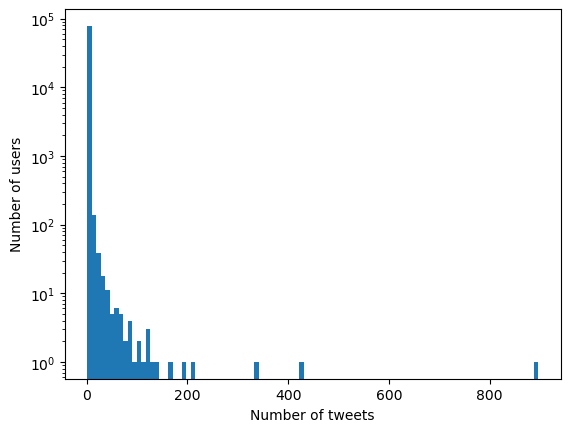

In [15]:
import matplotlib.pyplot as plt
count_list = list(counts)
plt.hist(count_list, log=True, bins=100)
plt.xlabel('Number of tweets')
plt.ylabel('Number of users')

Looks like there are some people who tweeted a lot! What do they actually tweet about?

In [16]:
# List the 10 most frequent usernames
print(counts.nlargest(10))

# Print some of the tweets of each of the 5 most frequent usernames
most_frequent = counts.nlargest(5).to_dict()
# for each username in the set
for name in most_frequent.keys():
  # get a sample of the associated tweets and print
  sample = tweets[tweets.username == name].tweet_text.sample(5)
  print(name)
  print(sample)

username
data_dreaming      896
malakmajali98      423
Puma_Bae_          333
fxjinrishi         210
DatPalmtopTiger    193
Gooundo_BELIEVE    163
thelouatkin        139
Ratihrauhll        135
izaynqueens        126
smokingdallas      121
Name: count, dtype: int64
data_dreaming
78720    RT @thefireblaze44: Last night I dreamed that ...
61869    RT @thessa_pink: I dreamed last night that Dar...
65261    RT @kjnisamutt: Last night I dreamed I killed ...
78833    RT @PerfectlyMee_ta: “@_NeeAlizaay: I dreamed ...
65553    RT @SaarahSaraah: Last night I dreamed that I ...
Name: tweet_text, dtype: object
malakmajali98
25141    @justinbieber will follow me one day and then ...
49611    @justinbieber will follow me one day and then ...
72667    @justinbieber will follow me one day and then ...
36306    @justinbieber will follow me one day and then ...
61439    @justinbieber will follow me one day and then ...
Name: tweet_text, dtype: object
Puma_Bae_
81805    @JacobWhitesides I dreamed that yo

Now, where to go from here? Should we drop all these tweets because they're spam? Maybe we should only drop some, based also on what the actual content of the tweets is? Questions like these usually don't have an easy, clear-cut answer. Depending on your research question, you might decide to drop them, especially if you're trying to infer some more general facts about all the people that use Twitter. In contrast, if your analysis is on the level of individual users, finding that they engage in this behaviour might be highly valuable information.

For this small study we want to remove all tweets from users who tweeted more than twice in our sample.

Task 5: First, make a list of all accounts who tweeted more than twice. Then, using that list, complete the cell below to make a column that identifies tweets from spam accounts.

In [17]:
threshold = 2
# Create a list of usernames of all people who exceed the threshold
spammers = counts[counts > 2].keys()

In [18]:
# Mark their tweets
# Hint: Use the isin function from the pandas api on the correct column
tweets['is_from_spammer'] = tweets['username'].isin(spammers)

n_spam_tweets = sum(tweets.is_from_spammer)
assert n_spam_tweets == 15083, f'Your function spotted {n_spam_tweets}, it should have spotted 15083.'

Let's plot our fifty tweets again, this time also flagging up spam tweets.

In [19]:
tweets['to_keep'] = ~ (tweets.is_retweet | tweets.is_duplicate | tweets.is_from_spammer)

# hack because plotly has a bug for using bools as coloring attribute
tweets['to_keep_str'] = tweets['to_keep'].astype(str)

px.scatter(tweets[5000:5050],x='time',y='length',color='to_keep_str',hover_data=['tweet_text'], color_discrete_sequence=px.colors.qualitative.Plotly)

Q2: Now after the cleanup, look at the fifty tweets again.

2.1) Did we manage to increase the percentage of tweets that contain a genuine dream description? \\
2.2) What problems still remain?

A: The percentage of tweets that contain actual dream descriptions did increase, but there are still tweets that talk about dreams as in goals to be achieved in life. There are also tweets that just have the word "dream" in them but do not talk about that person's actual dream, e.g. "I dreamed a dream - alcoholic version".

In [20]:
# actually drop these instances now
tweets = tweets[tweets.to_keep]
print(tweets.shape)

(59330, 11)


### Changing tweet formatting



Let's try and eliminate some of the variation in the tweets that we're not interested in. We'll define functions for replacing usernames, hashtags and links with generic tokens.

In [21]:
import re
# uses a regex to detect usernames and replaces them by USERNAME
def replace_username(in_string):
    return re.sub('@(\w){1,15}','USERNAME',in_string)
# uses a regex to detect hashtags and replaces them by HASHTAG
def replace_hashtag(in_string):
    return re.sub('#(\w)*','HASHTAG',in_string)
# uses a regex to detect links and replaces them by LINK
def replace_link(in_string):
    return re.sub('(http:)?//t.co/\w*', 'LINK',in_string)

# map the text to itself, applying each of the functions
tweets.tweet_text = tweets.tweet_text.map(replace_username)
tweets.tweet_text = tweets.tweet_text.map(replace_hashtag)
tweets.tweet_text = tweets.tweet_text.map(replace_link)

<>:4: SyntaxWarning:

invalid escape sequence '\w'

<>:7: SyntaxWarning:

invalid escape sequence '\w'

<>:10: SyntaxWarning:

invalid escape sequence '\w'

<>:4: SyntaxWarning:

invalid escape sequence '\w'

<>:7: SyntaxWarning:

invalid escape sequence '\w'

<>:10: SyntaxWarning:

invalid escape sequence '\w'

/tmp/ipykernel_24968/2678135665.py:4: SyntaxWarning:

invalid escape sequence '\w'

/tmp/ipykernel_24968/2678135665.py:7: SyntaxWarning:

invalid escape sequence '\w'

/tmp/ipykernel_24968/2678135665.py:10: SyntaxWarning:

invalid escape sequence '\w'



Now, let's also remove everything that has a link in it. We'll assume a genuine dream description does not contain a link.

Task 6: Make a function that returns true if the new LINK token is in a tweet, then add a new column 'has_link' to the data frame.

In [22]:
# A function that indicates whether a string contains a link
def hasLink(string):
    return 'LINK' in string

tweets['has_link'] = tweets.tweet_text.apply(hasLink)

In [23]:
n_tweets_with_link = sum(tweets.has_link)
assert n_tweets_with_link == 5508, f'Your function spotted {n_tweets_with_link}, it should have spotted 5508.'

In [24]:
# drop the tweets
tweets = tweets[~tweets.has_link]
print(len(tweets))

53822


If everything went correctly up to here, you'll notice we've dropped close to half of our original tweets! Data cleaning often takes a heavy toll. Now, let's look into the actual text.

## Text analysis

What dreams do people describe in their tweets?

Maybe we should first look at what words are frequent to appear in the tweets? For this purpose, we'll need to split them into lists of tokens. A token is a string of characters separated by white space. We thus need to perform tokenization, i.e. we need to split punctuation marks from words.

NLTK has a variety of tokenizers. The most commonly used tokenizers is just a function from the base package called *word_tokenize*. However, there is also a tokenizer specifically for tweets, called the tweet tokenizer.

This tokenizer has three parameters. For each of them, by means of varying the *sample_sentence* and by checking the documentation, find out what it does.

Q3: What is the effect of the three parameters of the TweetTokenizer?

A: The three parameters accepted by TweetTokenizer are:
* `preserve_case`: This parameter controls whether the capitalisation (upper- and lowercase) of the text in the tweet should be kept or not. Example:
    ```python
    >>> TweetTokenizer(preserve_case=True).tokenize('This is a tweet')
    ['This', 'is', 'a', 'tweet']
    >>> TweetTokenizer(preserve_case=False).tokenize('This is a tweet')
    ['this', 'is', 'a', 'tweet']
    ```
* `reduce_len`: This parameter controls whether repeated character sequences of 3 or more characters should be replaced with sequences of length 3. Example:
    ```python
    >>> TweetTokenizer(reduce_len=True).tokenize('This is a tweeeeeeeeeet')
    ['This', 'is', 'a', 'tweeet']
    >>> TweetTokenizer(reduce_len=False).tokenize('This is a tweeeeeeeeeet')
    ['This', 'is', 'a', 'tweeeeeeeeeet']
    ```
* `strip_handles`: This parameter controls whether or not to remove Twitter handles (the username preceded by the '@' character) from the tweet text. Example:
    ```python
    >>> TweetTokenizer(strip_handles=True).tokenize('This tweet has a @handle')
    ['This', 'tweet', 'has', 'a']
    >>> TweetTokenizer(strip_handles=False).tokenize('This tweet has a @handle')
    ['This', 'tweet', 'has', 'a', '@handle']
    ```

In [25]:
from nltk import download, FreqDist
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
# downloading this NLTK data might take a while depending on your connection
download('punkt')
download('stopwords')

[nltk_data] Downloading package punkt to /home/vinicius/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/vinicius/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
sample_sentence = 'We\'ll need to split them into lists of tokens. And then some more.'
tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles= True)
token_list = tokenizer.tokenize(sample_sentence)
print(token_list)

["we'll", 'need', 'to', 'split', 'them', 'into', 'lists', 'of', 'tokens', '.', 'and', 'then', 'some', 'more', '.']


Now, let's look at the distribution of tokens in the sentence. We'll use the FreqDist class for this.

In [34]:
freq_dist = FreqDist(token_list)
freq_dist

FreqDist({'.': 2, "we'll": 1, 'need': 1, 'to': 1, 'split': 1, 'them': 1, 'into': 1, 'lists': 1, 'of': 1, 'tokens': 1, ...})

Q4: What does invoking the FreqDist result in?

A: It results in a dictionary where the key is a token and the value is the frequency that token appears in the given token list / sentence.

Let's try to only look at a window of words following the query phrase. We made a function for this purpose.

In [35]:
def find_following_tokens(tweet):
  phrase = tweet.phrase

  parts = tweet.tweet_text.lower().split(phrase.lower())
  words_after = parts[-1]

  token_list = tokenizer.tokenize(words_after)

  return token_list

tweets['immediately_after'] = tweets.apply(find_following_tokens, axis=1)

In [36]:
tweets['immediately_after'].sample(15)

43011                     [about, and, wish, i, had, 🎤, 🎶]
61120    [i, was, getting, tattooed, &, the, guy, wante...
6976                 [a, dream, of, a, screen, like, this]
76434    [that, my, ex, best, friend, was, marrying, an...
9402     [that, it, was, the, last, day, of, school, ,,...
65914    [a, dream, ., lol, not, sure, it's, helping, ....
1169     [a, dream, em, homenagem, a, essa, matéria, :,...
33730                        [you, into, life, ., 🎶, 🎶, 🎶]
68029    [of, the, golden, girls, ..., hashtag, hashtag...
26239    [there, was, this, damn, usb, stick, in, my, f...
46404    [that, i, heard, hashtag, on, tge, radio, ,, i...
79257             [there, was, a, locus, in, my, bed, ...]
18742    [that, neymar, was, my, driver, ..., strange, ...
21737    [a, dream, i, had, a, selfie, with, katy, perr...
84898    [that, i, get, bullied, by, my, friend, ,, som...
Name: immediately_after, dtype: object

Let's look at the distribution of words in this window for every tweet. Run the following two cells to get a glimpse of the distribution in a plot.

In [38]:
from multiprocessing import Pool, cpu_count

pool = Pool(cpu_count())
out = pool.map(FreqDist, tweets.immediately_after.to_list())
pool.close()

word_dist = FreqDist()
for dist in out:
  word_dist.update(dist)

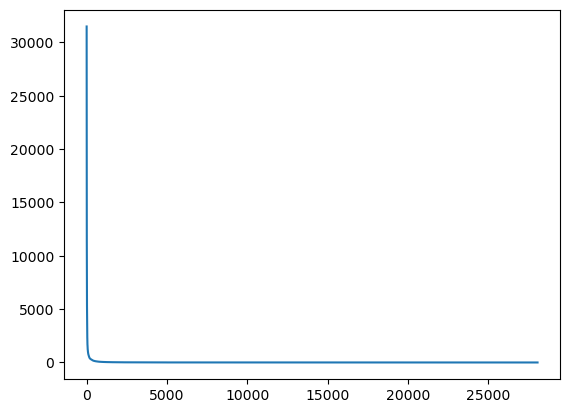

In [39]:
word_freqs = sorted(word_dist.values(),reverse=True)
plt.plot(word_freqs)

Q5:

5.1) How should the x and the y axis be labelled? \\
5.2) What pattern can you see in the plot? \\
5.3) Referring back to the lecture slides, do you know a name for this phenomenon?

A: The x axis should be the "word raking" and the y axis should be the the "frequency". We can see that the word ranking is inversely proportional to the frequency of that word. This is also known as Zipf's Law.

Now, let's look at some of the words to see if we can identify any patterns.

In [40]:
word_dist.most_common(25)

[('i', 31501),
 ('.', 26078),
 ('and', 19890),
 ('a', 17589),
 ('was', 16237),
 ('that', 15024),
 ('about', 13995),
 ('of', 13836),
 ('you', 13676),
 (',', 11985),
 ('the', 11380),
 ('it', 10326),
 ('my', 10202),
 ('to', 9518),
 ('in', 8038),
 ('!', 7993),
 ('me', 7875),
 ('username', 6384),
 ('night', 6202),
 ('dream', 5855),
 ('with', 5535),
 ('last', 5444),
 ('hashtag', 5311),
 ('...', 5065),
 ('so', 4466)]

Nothing too remarkable, right?

Instead of only looking at single words at a time, let's try looking at longer strings of words. Below, we have specified a function for your convenience. It extracts n-grams, sequences of n adjacent words.



In [41]:
from nltk import ngrams
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

def extract_ngram_freqs(token_list, n):
  grams = list(ngrams(token_list, n))
  cleaned_grams = []
  for word_tuple in grams:
      for word in word_tuple:
          if word not in stopwords:
              cleaned_grams.append(word_tuple)
              break

  return cleaned_grams

In [47]:
extract_ngram_freqs(['I', 'dreamed', 'about', 'you'], n=3)

[('I', 'dreamed', 'about'), ('dreamed', 'about', 'you')]

Q6: Run the cell above and vary the parameters of the function call, i.e. by feeding in another short sentence in the same format or by changing n.

6.1) What does the function do? \\
6.2) What exactly is extracted? \\
6.3) What exactly is omitted, i.e. left out? (Yes some things are omitted!)

A: *Your answer here*

To extract n-grams for a large number of tweets, we've specified another function that uses multiprocessing. You don't need to understand its detailed workings, but you can treat it as a prototype in case you ever need to parallelise an extraction task.

In [ ]:
from multiprocessing import Pool, cpu_count
from functools import partial
'''
A function to extract ngrams for every tweet in a frame.
If not present, adds a column with the list of n-grams to the frame.
Its name is dependent on n.
'''
def extract_and_add_ngrams(frame, token_column, n):

  pool = Pool(cpu_count())
  # See FAQ in case your local machine raises an error here
  extractor_func = partial(extract_ngram_freqs, n=n)
  list_of_grams = pool.map(extractor_func, list(tweets.immediately_after))
  pool.close()

  # so grams1, grams2 and so on
  name = 'grams' + str(n)
  if name not in frame.columns:
    tweets[name] = list_of_grams
  return name

Let's try and graphically inspect these n-grams. We'll download a package called wordcloud and then make some word clouds for different settings of n.


In [ ]:
!pip install wordcloud

This is a helper function that takes care of the plotting. You don't need to understand what it does to proceed with the assignment.

In [ ]:
from nltk.probability import MLEProbDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_dist_as_cloud(word_dist):
  prob_dist = MLEProbDist(word_dist)
  viz_dict = {}
  for word_tuple in word_dist:
    string = ' '.join(word_tuple)
    viz_dict[string] = prob_dist.prob(word_tuple)

  cloud = WordCloud(width=1600,height=400).generate_from_frequencies(viz_dict)

  plt.figure(figsize = (25,25))
  plt.imshow(cloud, interpolation='bilinear')

  plt.axis("off")

The following cell extracts and plots n-grams. Vary the parameter, trying out some settings between say 1 and 5.


In [ ]:
# Vary this parameter
# See FAQ in case of function not terminating
n = 2
# extracts the n-grams
column_name = extract_and_add_ngrams(tweets,'immediately_after', n = n)

word_dist = FreqDist()
for grams in tweets[column_name]:
  word_dist.update(FreqDist(grams))
print(f'Found {len(word_dist)} unique n-grams for n = {n}')

most_common = word_dist.most_common(25)
for word_tuple in most_common:
  print(word_tuple)
# calls our helper function for plotting
plot_dist_as_cloud(word_dist)

Q7: \\
What happens when you increase the size of n from 2 to 5? Specifically, \\
7.1) What happens to the number of n-grams? \\
7.2) What happens to the occurrence count of the most frequent n-gram? \\
7.3) Why do you think this is the case?

A: *Your answer here*

Both the most frequent word n-grams and the word cloud remarkably show that certain exact phrases are repeated by many users. We would not expect that users express their  personal dream experiences in the exact same words, and indeed these tweets do not express dreams but something else.

Q8: So what is going on here? Why are people using the same phrase over and over?

A: *Your answer here*

Q9: Can you think of ways to remove these tweets from the sample ? (you do not need to code this solution, only reflect on the problem)

A: *Your answer here*




In [ ]:
from functools import partial
# give people the chance to try to find which tweets contain these grams

def has_phrase(gram_list, phrase_tuple):
  return str(phrase_tuple in gram_list)

def search_for_phrase(frame, phrase):

  phrase = phrase.lower()
  phrase_parts = phrase.split(' ')
  phrase_tuple = tuple(phrase_parts)

  search_func = partial(has_phrase,phrase_tuple=phrase_tuple)

  search_field_name = 'grams' + str(len(phrase_tuple))
  if search_field_name not in frame:
     extract_and_add_ngrams(frame,'immediately_after',len(phrase_tuple))

  search_frame = frame.copy()
  search_frame['match'] = search_frame[search_field_name].apply(search_func)
  return search_frame

Maybe one of those phrases has piqued your interest and you want to look at some of the tweets that contain it? In the following cell, you can swap out the contents of the phrase variable.

In [ ]:
phrase = 'when i woke up'
search_frame = search_for_phrase(tweets,phrase)
px.scatter(search_frame,x='time',y='length',color='match',hover_data=['tweet_text'], , color_discrete_sequence=px.colors.qualitative.Plotly)

Q10: Try searching for the phrase 'about you nearly every night'. Can you make a guess where people found the inspiration for that phrase?

A: *Your answer here*

## Discussion ##

Our starting point for this study was to investigate what the dream themes most frequently described on Twitter are. We inspected the data sample and attempted various cleaning steps.

However: your inspection of the data has uncovered a huge problem with the sample as it turns out to be extremely difficult to separate genuine dream reports from other tweets that for some other reason contained the phrase 'I dreamed'.

Q11: Do you think that the data sample we are using is actually suited to answer your research question 'What are the dream themes most frequently described on Twitter'? Explain your answer.

A: *Your answer here*

## Dream themes

So far, our bottom-up approach to dream data on Twitter has revealed little. Given the high number of tweets and the strong noise in the data, manual inspection for dominant topics is quite hard. We could try and ease this process, e.g. by attempting topic modelling or some dimensionality reduction technique, but these topics will only be discussed in the lectures over the coming weeks.

For now, let's try another way. Let's make up an explicit hypothesis about what people dream about based on a [scientific study](https://dreams.ucsc.edu/Library/bulkeley_2010.html) of dream reports by Bulkeley, K., and Domhoff, G. W. (2010), that counted how certain themes are mentioned in dream reports by simply counting words.

Two common themes are flying and falling. We'll then try and separate our tweets based on whether they actually contain words associated with them. Let's see how frequent these themes really are in our Twitter sample!


We made a dictionary whose keys represent the two themes. For each key, there is  a list of associated phrases as used in the study.

In [ ]:
dream_class_dict = {
    'falling': ['falls','fell','falling','collapses','collapsed','collapsing','drops','dropped','dropping'],
    'flying': ['fly','flies','flew','flying','floats','floated','floating','glides','gliding','glided']
}

The following code cells extract the relevant word counts from the tweets and then classify each tweet based on the match with the word lists.

In [ ]:
new_dict = {}
n_grams_needed = set()
for dream_class in dream_class_dict.keys():
    list_of_phrases = dream_class_dict[dream_class]
    grams = []
    for phrase in list_of_phrases:
      phrase = phrase.lower()
      words = phrase.split(' ')
      gram_rep = tuple(words)
      n_grams_needed.add(len(gram_rep))
      grams.append(gram_rep)
    new_dict[dream_class] = grams

for n_gram in n_grams_needed:
   list_name = 'grams' + str(n_gram)
   if list_name not in tweets.columns:
     extract_and_add_ngrams(tweets,'immediately_after',n_gram)

dream_class_dict = new_dict

In [ ]:
'''
Classify a tweet according to its dream class. Returns the class name of the best match.
Unassigned is returned if no matching class was found.
'''
def classify_tweet(tweet):
  class_scores = {}
  for dream_class in dream_class_dict.keys():
    gram_list = dream_class_dict[dream_class]
    counter = 0
    for gram in gram_list:
      # get the correct gram list for the lookup
      list_name = 'grams' + str(len(gram))
      grams_in_tweet = tweet[list_name]
      if gram in grams_in_tweet:
        counter = counter + 1
    class_scores[dream_class] = counter

  highest_score = 0
  best = 'unassigned'

  for class_name in class_scores.keys():
    if class_scores[class_name] > highest_score:
      highest_score = class_scores[class_name]
      best = class_name
  return best

Now, let's plot the tweets again, using the assigned classes as labels.

In [ ]:
class_frame = tweets.copy()
class_frame['class'] = tweets.apply(classify_tweet, axis=1)

px.scatter(class_frame,x='time',y='length',color='class',hover_data=['tweet_text'], color_discrete_sequence=px.colors.qualitative.Plotly)

Q12: In the Bulkeley & Domhoff study sourced above, falling dreams are reported twice as often as flying dreams. Is this the same in the Twitter sample? Explain how you derived your answer.

A: *Your answer here*

Q13: What limitations do you see in this paradigm? Try to make sense of the classify_tweet function.

13.1) How does it work? \\
13.2) Do you see errors it makes? \\
13.3) How could it be improved?

A: *Your answer here*

# FAQ

Here you can find a list of frequently asked questions. Make sure to check them out!

**Q: Will I get a grade for this assignment?** \\
A: All assignments will be graded with a Pass or a Fail. You need to pass all assignments in order to take the exam. Make sure to checkout the learning objectives for each assignment, as the assessment will be based on whether we think you've passed the learning objectives.

**Q: What if I don't know the answer to a task or question?** \\
A: First of all, don't worry! You can contact the TAs and ask for help during the office hours on Monday (physically or through discord), or by sending an email.

**Q: I get the output message 'Not all tweets were loaded', what am I doing wrong?** \\
A: Sometimes after reloading the notebook in Colab, not the entire data file is uploaded. Make sure to check whether it is correctly uploaded, and if needed reupload. Another possibility is that the file contains a character that for some reason is not handled correctly on your computer. This doesn't happen often, but you can check at which tweet your load_data function stopped parsing and manually inspect the tweet to remove/alter the character.

**Q: I think I did a task correctly, but the assert tells me I don't have the correct number of tweets left, what am I doing wrong?** \\
A: Most likely, you have a code that indeed works properly, but that does not satisfy the exact given requirements of the task. Please reread the task and check whether you satisfy the requirements exactly as proposed.

**Q: I have strange bugs in the base code you provided, what do I do?** \\
A: This most likely has to do with settings specific to your local machine and/or python/library versions. All our code has been implemented and tested using [Google Colab](https://colab.research.google.com/), because this is relatively hassle-free. Please consider switching in case you experience such problems. We can try to help you out on other platforms, but cannot guarantee that we can solve it. The problems should be solved automatically when switching to Colab!

**Q: Plotly 4.0.0 won't install on my local machine, how can I fix this?** \\
A: In case you're running the assignment locally and you get the error that it could not find a version that satisfies the requirement, try removing the apostrophes around 4.0.0. Another solution may be to first run 'uninstall plotly' and then run the code to install plotly 4.0.0.

**Q: The provided code for extract_and_add_ngrams is raising an error, how can I solve this?** \\
A: Sometimes, the function extract_and_add_ngrams raises errors on local machines due to the use of multiprocessing. Switching to Colab should automatically solve the issue without changing the code. In case you do not want to do so, you can replace the given function with the following code:

```
def extract_and_add_ngrams(frame, token_column, n):
  token_list = tweets.immediately_after.tolist()
  list_of_grams = []
  for tokens in token_list:
    gram = extract_ngram_freqs(tokens, n)
    list_of_grams.append(gram)

  # so grams1, grams2 and so on
  name = 'grams' + str(n)
  if name not in frame.columns:
    tweets[name] = list_of_grams
  return name
```

**Q: The function for extracting and plotting n-grams runs infinitely and never terminates with output, what do I do?** \\
A: Sometimes, running on your local machine may result in this. In the past, a reason has been computing power. Try lowering the parameter n. In case this does not work, please consider moving to Colab.

**Q: I get a different number of tweets every time I load the data, what is happening?** \\
A: Remember to always close a file after you are finished reading it.

**Q: My function for duplicate detection detects 17725 duplicates, what am I missing?** \\
A: Most likely you have not removed whitespaces at the end of the tweet when loading the data.

**Q: I cannot see the difference between the coloured dots in the plots. How can I enhance visibility?** \\
A: In the scatter plots called with `px.scatter(...)` you can update the `color_discrete_sequence` parameter to a color sequence with more contrast. A list of possible color sequences is given [here](https://plotly.com/python/discrete-color/#color-sequences-in-plotly-express).